In [1]:
import tensorflow as tf
models = tf.keras.models
layers = tf.keras.layers
VGG16 = tf.keras.applications.VGG16 # 기존 학습된 모델

model = models.Sequential()

transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(720, 480, 3)) # 전이학습: 시퀀스 중간에 넣을때는 include_top=False
transfer_model.trainable = False # 해당 모델은 가중치를 변경하지 않음 == False
model.add(transfer_model) #(None, 22, 15, 512) 
model.add(layers.Flatten()) # 1차원으로 변형
model.add(layers.Dense(330, activation='relu'))
model.add(layers.Dropout(0.5)) # 드롭아웃 50%
model.add(layers.Dense(330//2, activation='relu'))
model.add(layers.Dropout(0.1)) # 드롭아웃 10%
model.add(layers.Dense(2, activation='softmax'))  #vgg가 분류인가? # 이진 분류이므로 sigmoid 사용
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 22, 15, 512)       14714688  
                                                                 
 flatten (Flatten)           (None, 168960)            0         
                                                                 
 dense (Dense)               (None, 330)               55757130  
                                                                 
 dropout (Dropout)           (None, 330)               0         
                                                                 
 dense_1 (Dense)             (None, 165)               54615     
                                                                 
 dropout_1 (Dropout)         (None, 165)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 3

In [3]:
from IPython.display import clear_output
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='gulim')
history_df = pd.DataFrame()

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,          # 주어진 이미지의 크기를 설정합니다.
                                  horizontal_flip=True,     # 수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,    # 전체 크기의 15% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1,   # 마찬가지로 위, 아래로 이동합니다.
                                  rotation_range=5,        # 정해진 각도만큼 회전시킵니다.
                                  #shear_range=0.7,         # 좌표 하나를 고정시키고 나머지를 이동시킵니다.
                                  zoom_range=0.05,          # 확대 또는 축소시킵니다.
                                  #vertical_flip=True,      # 수직 대칭 이미지를 만듭니다.
                                  fill_mode='nearest'      # 빈 공간을 채우는 방법입니다. nearest 옵션은 가장 비슷한 색으로 채우게 됩니다.
                                  )    

train_generator = train_datagen.flow_from_directory(
       r'C:\source\kamp_ex\train',
       target_size=(720, 480),
       batch_size=1,
       class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
       r'C:\source\kamp_ex\test',
       target_size=(720, 480),
       batch_size=1,
       class_mode='binary')

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator,
#     validation_steps=10 
    # callbacks=[early_stopping_callback]
)



Found 1152 images belonging to 2 classes.
Found 290 images belonging to 2 classes.
Epoch 1/5
1152/1152 [==============================] - 71s 61ms/step - loss: 0.1808 - accuracy: 0.9566 - val_loss: 0.1934 - val_accuracy: 0.9517
Epoch 2/5
1152/1152 [==============================] - 71s 62ms/step - loss: 0.1799 - accuracy: 0.9566 - val_loss: 0.1938 - val_accuracy: 0.9517
Epoch 3/5
1152/1152 [==============================] - 70s 61ms/step - loss: 0.1805 - accuracy: 0.9566 - val_loss: 0.1936 - val_accuracy: 0.9517
Epoch 4/5
1152/1152 [==============================] - 71s 62ms/step - loss: 0.3388 - accuracy: 0.9557 - val_loss: 0.1940 - val_accuracy: 0.9517
Epoch 5/5
1152/1152 [==============================] - 71s 62ms/step - loss: 0.1794 - accuracy: 0.9566 - val_loss: 0.1935 - val_accuracy: 0.9517


In [4]:
model.save('C:\source\learning_kamp_vgg16.keras')

{'loss': [1.4689491987228394], 'accuracy': [0.9244791865348816], 'val_loss': [0.4212516248226166], 'val_accuracy': [0.9565972089767456]} <keras.callbacks.History object at 0x0000016616B37D88>


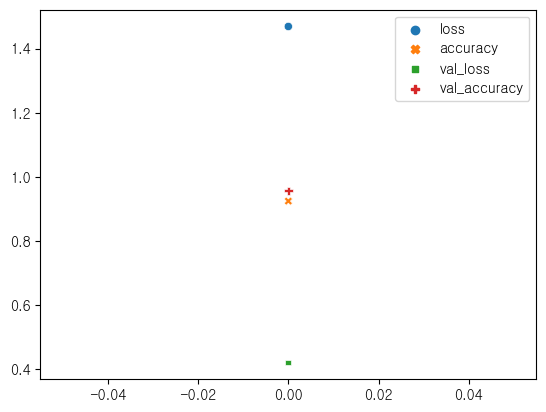

In [25]:
import seaborn as sns
sns.scatterplot(history.history)
print(history.history, history)